In [1]:
#Import the code libaries.
import tensorflow as tf
from tensorflow.keras import layers, datasets, Sequential, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data preprocess.
#Load MNIST data into Variables
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data("MNIST_data")
for i in range(10):
    print('The %d train set label:'%(i),y_train[i])
    print('The %d test set label: '%(i),y_test[i])

#Reshape the data into [-1,28,28,1] form, and Normalize the data
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255
x_test = x_test.reshape(-1,28,28,1).astype('float32')/255
print("Train figures sets shape:", x_train.shape)
print("Test figures sets shape:", x_test.shape)
print("Train labels sets shape:", y_train.shape)
print("Test labels sets shape:", y_test.shape)

#To convert the label data into a matricx.
#This step can transfer 0 to [1,0,0,0,0,0,0,0,0,0]. like this format.
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
for i in range(10):
    print('The %d train set label:'%(i),y_train[i])
    print('The %d test set label: '%(i),y_test[i])

The 0 train set label: 5
The 0 test set label:  7
The 1 train set label: 0
The 1 test set label:  2
The 2 train set label: 4
The 2 test set label:  1
The 3 train set label: 1
The 3 test set label:  0
The 4 train set label: 9
The 4 test set label:  4
The 5 train set label: 2
The 5 test set label:  1
The 6 train set label: 1
The 6 test set label:  4
The 7 train set label: 3
The 7 test set label:  9
The 8 train set label: 1
The 8 test set label:  5
The 9 train set label: 4
The 9 test set label:  9
Train figures sets shape: (60000, 28, 28, 1)
Test figures sets shape: (10000, 28, 28, 1)
Train labels sets shape: (60000,)
Test labels sets shape: (10000,)
The 0 train set label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The 0 test set label:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The 1 train set label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The 1 test set label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The 2 train set label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The 2 test set label:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The 3 train se

In [3]:
#Creat a CNN layers
Conv_layers = [
    #First layer
    layers.Conv2D(filters=32, kernel_size = [3,3], padding = 'same', input_shape = [28,28,1], activation = tf.nn.relu),
    layers.MaxPool2D(pool_size=[2,2]),
    
    #Second layer
    layers.Conv2D(filters=64, kernel_size = [3,3], padding = 'same', input_shape = [28,28,1], activation = tf.nn.relu),
    layers.MaxPool2D(pool_size=[2,2]),
    
    #Third layer
    layers.Conv2D(filters=128, kernel_size = [3,3], padding = 'same', input_shape = [28,28,1], activation = tf.nn.relu),
    layers.MaxPool2D(pool_size=[2,2]),
    
    #fLatten the all parameters
    layers.Flatten(),
    
    #Full connection layer with dropout 0.25.
    layers.Dense(128, activation = tf.nn.relu),
    layers.Dropout(0.25),
    layers.Dense(10, activation = tf.nn.softmax)
]

#Put those layer in to the Sequential list.
model = Sequential(Conv_layers)

#Output a report of the CNN layer.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [4]:
#Training model

#The optimizer is Adam
#The loss function is categorical_crossentrop
#The matricx information is accuracy
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),loss = 'categorical_crossentropy',metrics = ['Accuracy'])

#Traning setting, define the epochs, batch_size. Save the hissory to a variable
History = model.fit(x_train,y_train, epochs = 10, batch_size = 500,validation_split = 0.1)


Epoch 1/10
108/108 [==============================] - 38s 336ms/step - loss: 0.5296 - Accuracy: 0.8401 - val_loss: 0.1002 - val_Accuracy: 0.9688
Epoch 2/10
108/108 [==============================] - 36s 331ms/step - loss: 0.1049 - Accuracy: 0.9677 - val_loss: 0.0540 - val_Accuracy: 0.9847
Epoch 3/10
108/108 [==============================] - 35s 326ms/step - loss: 0.0720 - Accuracy: 0.9778 - val_loss: 0.0415 - val_Accuracy: 0.9872
Epoch 4/10
108/108 [==============================] - 33s 304ms/step - loss: 0.0556 - Accuracy: 0.9830 - val_loss: 0.0373 - val_Accuracy: 0.9890
Epoch 5/10
108/108 [==============================] - 33s 304ms/step - loss: 0.0448 - Accuracy: 0.9863 - val_loss: 0.0349 - val_Accuracy: 0.9905
Epoch 6/10
108/108 [==============================] - 33s 302ms/step - loss: 0.0385 - Accuracy: 0.9883 - val_loss: 0.0309 - val_Accuracy: 0.9913
Epoch 7/10
108/108 [==============================] - 33s 303ms/step - loss: 0.0316 - Accuracy: 0.9899 - val_loss: 0.0343 - val_Ac

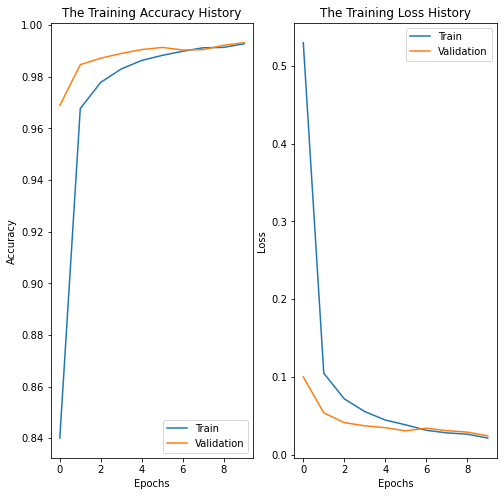

In [5]:
#Plot the training history in a diagram

#Plot the accuracy diagram
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(History.history['Accuracy'], label = 'Train') 
plt.plot(History.history['val_Accuracy'], label = 'Validation')
plt.title('The Training Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

#Plot the loss diagram
plt.subplot(1,2,2)
plt.plot(History.history['loss'], label = 'Train') 
plt.plot(History.history['val_loss'], label = 'Validation')
plt.title('The Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

In [6]:
#Test
Loss, accuracy = model.evaluate(x_test,y_test,batch_size=1,verbose=2)
#print the results out
print("The loss is: ", Loss)
print("The accuracy is :", accuracy)

10000/10000 - 12s - loss: 0.0221 - Accuracy: 0.9926
The loss is:  0.02209681272506714
The accuracy is : 0.9926000237464905
